<a href="https://colab.research.google.com/github/kKravtsova/data_and_python/blob/main/Data_project_Digital_marketing_kkravtsova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Marketing ads campain analysis
---



Data source: https://www.kaggle.com/datasets/faviovaz/marketing-ab-testing/download?datasetVersionNumber=1



## Objectives
I am interested in digital marketing, advertising strategy, user behavior analysis, and conversion rate optimization.

By looking at the relationship between ad exposure (total_ads) and purchase behavior (converted), analysts can determine how effective the advertising campaigns are in driving sales.

Data on the hour when the most ads are seen (most_ads_hour) can help marketers to optimize the timing of their ads to reach potential customers when they are most active or receptive.

By analyzing the days when users are exposed to the most ads, companies can assess which days are best for targeting their audience, potentially leading to better allocation of advertising budgets.

Understanding which days and times users are most likely to engage with ads can help in planning content release schedules, promotional activities, and even help in understanding user behavior in relation to the product or service.

For those in the psa group, the dataset could be used to analyze whether public service announcements have an influence on product purchase behavior compared to traditional ads.

In summary, stakeholders might use this dataset to refine marketing strategies, improve ad targeting, and ultimately, to increase return on investment from their advertising and promotional activities.


## The dataset
_reference and link to the source of the data_
* description of the dataset
* description of the processing with code in the box below to show summary information about the data

---



In [ ]:
## describe the dataset (number of records, statistics, columns, etc)

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [18]:
# connect to data, upload data
url = 'https://raw.githubusercontent.com/kKravtsova/data_and_python/main/Data%20Sets/marketing_AB.csv'
df = pd.read_csv(url)
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [19]:
# getting main information about dataset such a number of columns, datatypes, non-null count of values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


Data set describtion:
* Index: Row index
* user id: User ID (unique)
* test group: If "ad" the person saw the advertisement, if "psa" they only saw the public service announcement
* converted: If a person bought the product then True, else is False
* total ads: Amount of ads seen by person
* most ads day: Day that the person saw the biggest amount of ads
* most ads hour: Hour of day that the person saw the biggest amount of ads

In [20]:
# Return a tuple representing the dimensionality of the DataFrame
df.shape

(588101, 7)

In [21]:
# describe() provides a statistical summary for numerical columns
df.describe()

,Unnamed: 0,user id,total ads,most ads hour
count,588101.000000,5.881010e+05,588101.000000,588101.000000
mean,294050.000000,1.310692e+06,24.820876,14.469061
std,169770.279668,2.022260e+05,43.715181,4.834634
min,0.000000,9.000000e+05,1.000000,0.000000
25%,147025.000000,1.143190e+06,4.000000,11.000000
50%,294050.000000,1.313725e+06,13.000000,14.000000
75%,441075.000000,1.484088e+06,27.000000,18.000000
max,588100.000000,1.654483e+06,2065.000000,23.000000


## Cleaning the data
_what will you do to get the data ready for analysis_
* sorting
* removing null data
* forming new data tables
* ...
---


In [22]:
## data cleaning code
# We don't need the fist column as it is a just row index we already have in dataframe
df_ab = df.drop(columns = 'Unnamed: 0')
df_ab

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14
...,...,...,...,...,...,...
588096,1278437,ad,False,1,Tuesday,23
588097,1327975,ad,False,1,Tuesday,23
588098,1038442,ad,False,3,Tuesday,23
588099,1496395,ad,False,1,Tuesday,23


In [23]:
# make column title more concencent
df_ab.columns = df_ab.columns.str.replace(' ', '_')
df_ab.head()

,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


In [24]:
# turn non-num values into nums
# will transform converted	and	most_ads_day columns
df_ab.dropna(inplace = True)
converted_set = set(df_ab['converted'])
print(converted_set)
df_ab['converted'] = df_ab['converted'].astype(int)
df_ab['converted'].max() # check

{False, True}


1

In [88]:
# encode most_ads_day to transform non-digital data to numeric
# create bool values columns for most_ads_day
# concatenate these columns with primary dataset and drop most_ads_day column
encoded = pd.get_dummies(df_ab.most_ads_day)
merged_df = pd.concat([df_ab, encoded], axis='columns')
merged_df.drop(columns = ['most_ads_day'], inplace = True)
merged_df

,user_id,test_group,converted,total_ads,most_ads_hour,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1069124,ad,0,130,20,0,1,0,0,0,0,0
1,1119715,ad,0,93,22,0,0,0,0,0,1,0
2,1144181,ad,0,21,18,0,0,0,0,0,1,0
3,1435133,ad,0,355,10,0,0,0,0,0,1,0
4,1015700,ad,0,276,14,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
588096,1278437,ad,0,1,23,0,0,0,0,0,1,0
588097,1327975,ad,0,1,23,0,0,0,0,0,1,0
588098,1038442,ad,0,3,23,0,0,0,0,0,1,0
588099,1496395,ad,0,1,23,0,0,0,0,0,1,0


In [89]:
# let's check what we got
merged_df.describe()

,user_id,converted,total_ads,most_ads_hour,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,5.881010e+05,588101.000000,588101.000000,588101.000000,588101.000000,588101.000000,588101.000000,588101.000000,588101.000000,588101.000000,588101.000000
mean,1.310692e+06,0.025239,24.820876,14.469061,0.157470,0.148058,0.138854,0.145198,0.141102,0.131744,0.137575
std,2.022260e+05,0.156850,43.715181,4.834634,0.364243,0.355158,0.345794,0.352301,0.348127,0.338213,0.344454
min,9.000000e+05,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.143190e+06,0.000000,4.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.313725e+06,0.000000,13.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.484088e+06,0.000000,27.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.654483e+06,1.000000,2065.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We see that min and max values for Friday	Monday	Saturday	Sunday	Thursday	Tuesday	Wednesday calumns are 0 and 1. It means that proccess of encoding has done successfully

## Analysing the data
_what analysis are you doing and why_
* producing summary statistics
* printing calculated statistics
* data analysis calculations (e.g. regression, correlation)
* ...

---



In this analysis we try to define if there is any strong dependences between convertions and other factors such a day or time.

In [99]:
## analysis code here
# compare test groups
test_groups_info = merged_df.groupby(['test_group'])
# max test groups compare
test_groups_info[['converted',	'total_ads',	'most_ads_hour']].max()

,converted,total_ads,most_ads_hour
test_group,,,
ad,1,2065,23
psa,1,907,23


In [100]:
# min test groups compare
test_groups_info[['converted',	'total_ads',	'most_ads_hour']].min()

,converted,total_ads,most_ads_hour
test_group,,,
ad,0,1,0
psa,0,1,0


Total ads max is almost twice different, when min of total ads is the same for both ad and psa groups

In [101]:
# mean test groups compare
test_groups_info[['converted',	'total_ads',	'most_ads_hour']].mean()

,converted,total_ads,most_ads_hour
test_group,,,
ad,0.025547,24.823365,14.475900
psa,0.017854,24.761138,14.304923


For ad group mean convertion is higher than for psa group

In [110]:
# undestand the User Engagemen
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
days_count = merged_df[days].sum()
days_count.sort_values(ascending = False)

Friday       92608
Monday       87073
Sunday       85391
Thursday     82982
Saturday     81660
Wednesday    80908
Tuesday      77479
dtype: int64

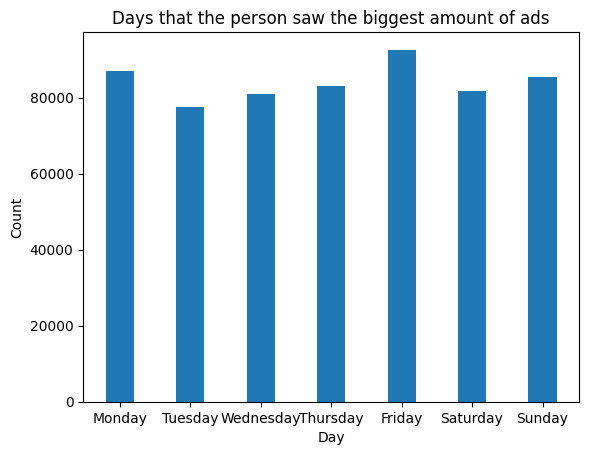

In [71]:
plt.bar(days, days_count, align='center', width=0.4)
plt.title('Days that the person saw the biggest amount of ads')
plt.xlabel('Day')
plt.ylabel('Count')
plt.show()

According to the stats and the plot we see that the most engagement days are **Friday Monday Sunday**

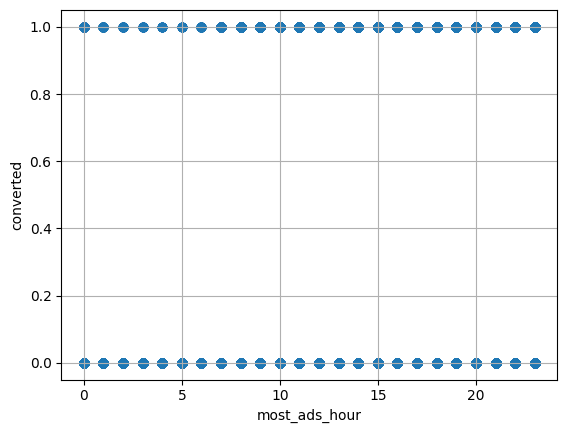

In [86]:
## visualisation code here
y = merged_df['converted']
x = merged_df['most_ads_hour']
plt.xlabel('most_ads_hour')
plt.ylabel('converted')
plt.grid()
plt.scatter(x, y)
plt.show()

It's seen that there is no dependency between convertion and time
Let's find out any possible dependency

In [79]:
merged_df.corr(numeric_only = True)

,user_id,converted,total_ads,most_ads_hour,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
user_id,1.000000,0.000635,0.012336,-0.023002,-0.000244,0.016778,-0.028471,-0.021324,-0.000999,0.020347,0.014381
converted,0.000635,1.000000,0.217419,0.019674,-0.008343,0.020127,-0.010722,-0.002005,-0.009478,0.011428,-0.000756
total_ads,0.012336,0.217419,1.000000,-0.010837,0.017715,0.004841,0.003737,-0.003933,-0.012907,-0.007979,-0.002573
most_ads_hour,-0.023002,0.019674,-0.010837,1.000000,0.020155,0.011996,0.019178,-0.007234,0.003518,-0.034716,-0.015004
Friday,-0.000244,-0.008343,0.017715,0.020155,1.000000,-0.180226,-0.173598,-0.178177,-0.175227,-0.168402,-0.172669
Monday,0.016778,0.020127,0.004841,0.011996,-0.180226,1.000000,-0.167398,-0.171814,-0.168969,-0.162388,-0.166502
Saturday,-0.028471,-0.010722,0.003737,0.019178,-0.173598,-0.167398,1.000000,-0.165496,-0.162755,-0.156416,-0.160380
Sunday,-0.021324,-0.002005,-0.003933,-0.007234,-0.178177,-0.171814,-0.165496,1.000000,-0.167048,-0.160542,-0.164610
Thursday,-0.000999,-0.009478,-0.012907,0.003518,-0.175227,-0.168969,-0.162755,-0.167048,1.000000,-0.157884,-0.161884
Tuesday,0.020347,0.011428,-0.007979,-0.034716,-0.168402,-0.162388,-0.156416,-0.160542,-0.157884,1.000000,-0.155579


* **user_id**: All the values are very close to 0, suggesting no linear relationship between user_id and any other variables. This is expected since user_id is just an identifier.

* **converted** has a moderate positive correlation with total_ads (0.21749), which suggests that there might be a tendency for higher ad exposure to relate to a higher likelihood of conversion, but this is not a strong correlation.

* **total_ads** seems to have very little to no correlation with most_ads_hour (-0.010837) and the days of the week (coefficients range from -0.016752 to 0.004841). This suggests that the total number of ads a person sees is not strongly dependent on the hour they see the most ads or the day of the week.

* **most_ads_hour** has a strong positive correlation with itself (1.00000), which is always the case for a variable with itself. It has no significant correlation with any other variable.

* The days of the week generally have low to negligible correlations with converted, suggesting that there isn't a strong linear relationship between the day when the most ads were seen and whether a user converted.

* It is also important to notice that days of the week are negatively correlated with each other. This is logical because if a person sees the most ads on one day, it is less likely for them to see the most ads on another day within the same week.

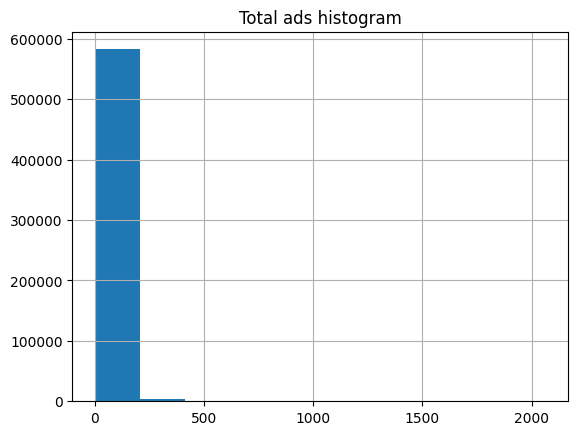

In [111]:
# let's analyze total ads destribution both Histogram and Probablity plot
data = merged_df['total_ads']
plt.hist(data)
plt.grid()
plt.title('Total ads histogram')
plt.show()

((array([-4.72010432, -4.53641687, -4.43698943, ...,  4.43698943,
          4.53641687,  4.72010432]),
  array([   1,    1,    1, ..., 1680, 1778, 2065])),
 (30.28937643259077, 24.82087600599217, 0.6928747355596183))

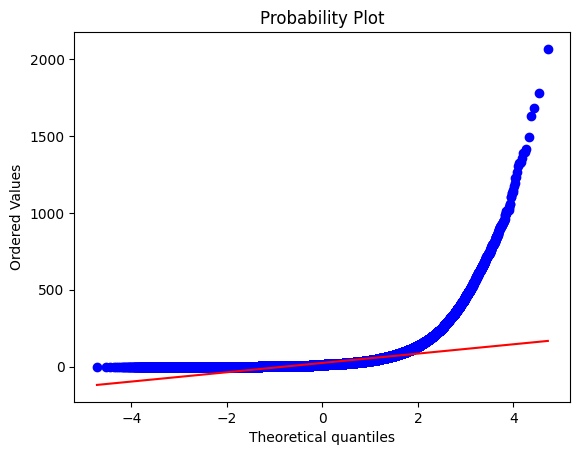

In [95]:
stats.probplot(data, plot = plt)

Both Histogram and Probablity plot show that destribution of total_ads is not normal

# Summary
Objective:
To assess the effectiveness of digital advertising on user conversion rates and optimize marketing strategies.

**Key Findings:**

A moderate positive correlation exists between the total number of ads seen and user conversions, indicating that ad exposure may positively influence purchase behavior.
No significant correlation was found between the hour or day with the most ad exposure and conversion rates, suggesting that the timing of ads may not have a strong impact on conversions.
Fridays, Mondays, and Sundays are the days with the highest user engagement in ad viewing.

**Python Skills Employed:**

Utilized pandas for data manipulation, cleaning, and encoding categorical variables.
Implemented matplotlib and scipy for statistical analysis and visualization, including histogram and probability plots.

**Opportunities for Improvement:**

Investigate non-linear relationships and user segmentation for deeper insights.
Apply machine learning models to predict conversion rates.
Conduct controlled A/B testing to validate the impact of ad exposure on conversions.

**Conclusion:**
The analysis provides valuable insights for marketers to refine ad targeting and improve ROI. Further research could deepen understanding and enhance predictive capabilities.